In [32]:
import json
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
GSV_URL = "https://maps.googleapis.com/maps/api/streetview?"
with open('config.json') as cf:
    data = json.load(cf)
    
API_KEY:str = data['API_KEY']

In [44]:
def get_url(lat: float, lon: float, fov: int = 120, heading: float = 0, pitch: float = 0, key=API_KEY):
    """_summary_
    Args:
        lat (float): 위도
        lon (float): 경도
        fov (float, optional): 이미지 수평시야 (90 ~ 120). Defaults to 120.
        heading (float, optional): 카메라 나침반 방향(0 ~ 360). Defaults to 0.
        pitch (float, optional): 스트리트 뷰 차량을 기준으로 카메라의 위 또는 아래 각도(-90 ~ 90). Defaults to 0.
        key (_type_, optional): API_KEY.

    Returns:
        _type_: request url
    """
    height = 400
    width = 600
    search_url = f'https://maps.googleapis.com/maps/api/streetview?size={width}x{height}&location={lat},{lon}&heading={heading}&pitch={pitch}&key={key}&return_error_code=true'
    return search_url


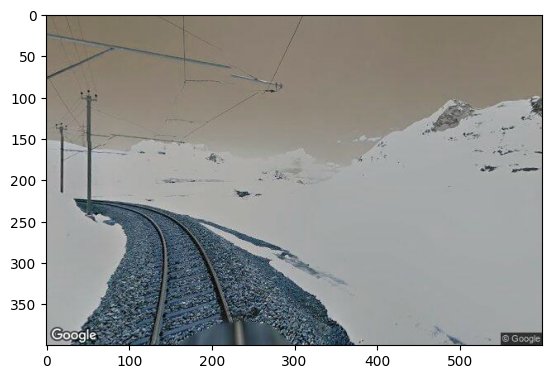

In [45]:
def gsv_test():
    """gsv request test"""
    url = get_url(46.4143, 10.0139, heading=151, pitch=0.76)
    res = requests.request('GET', url)
    image = cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), cv2.IMREAD_COLOR)
    return image
img = gsv_test()
plt.imshow(img)